In [1]:
import joint_defs
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2


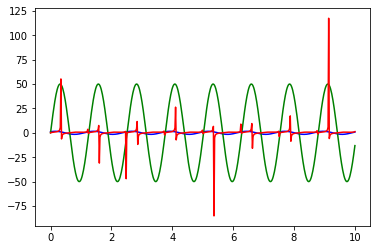

In [13]:
knee = joint_defs.RL4_KNE_PIT

t = np.linspace(0, 10, num=500)
angles = np.pi / 2 * np.sin(5*t + np.pi / 4)
torques = 50 * np.sin(5*t)
forces = []
for angle, torque in zip(angles, torques):
    knee.angles = knee.dof * np.array([angle] * 3)
    knee.torques = knee.dof * np.array([torque] * 3)
    forces.append(knee.torque_to_force())

plt.plot(t, angles, 'b')
plt.plot(t, torques, 'g')
plt.plot(t, forces, 'r')
plt.show()